In [5]:
%pylab inline
import numpy as np
from queue import deque
import tensorflow as tf

from tools import create_sin, make_timeseries, split_train_test, visualize_random_data
from tools import batch_loader, shuffle

from pprint import pprint as pp

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Data

train_x: (5232, 64, 1)
train_y: (5232, 64, 1)
test_x : (1308, 64, 1)
test_y : (1308, 64, 1)


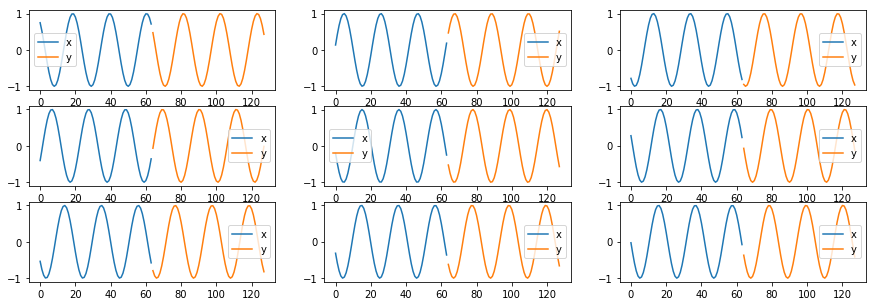

In [2]:
X_SIZE = 64
Y_SIZE = 64

data = create_sin()
data_x, data_y = make_timeseries(data, x_size=X_SIZE, y_size=Y_SIZE)
train_x, test_x = split_train_test(data_x)
train_y, test_y = split_train_test(data_y)

print('train_x:', train_x.shape)
print('train_y:', train_y.shape)
print('test_x :', test_x.shape)
print('test_y :', test_y.shape)

visualize_random_data(train_x, train_y)

# Model

In [3]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.1, allow_growth=True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options,
                                                   log_device_placement=True))

In [121]:
BATCH_SIZE = 256
X_TIME_SIZE = 64
Y_TIME_SIZE = 64
FEATURE_SIZE = 1
HIDDEN_SIZE = 32
RNN_OUTPUT_SIZE = 16


# np.random.seed(0)
encoder_input = tf.placeholder(tf.float32, shape=(None, X_TIME_SIZE, FEATURE_SIZE))
decoder_input = tf.placeholder(tf.float32, shape=(None, X_TIME_SIZE, FEATURE_SIZE))
y_true = tf.placeholder(tf.float32, shape=(None, Y_TIME_SIZE, FEATURE_SIZE))
init_state = tf.placeholder(tf.float32, shape=(None, HIDDEN_SIZE))

# Encoder 
with tf.variable_scope(f'encoder{np.random.randint(10000)}'):    
    encoder_cell = tf.contrib.rnn.BasicRNNCell(HIDDEN_SIZE)
    init_encoder_state = encoder_cell.zero_state(BATCH_SIZE, dtype=tf.float32)
    encoder_output, encoder_state = tf.nn.dynamic_rnn(encoder_cell, inputs=encoder_input, 
                                                      initial_state=init_encoder_state, 
                                                      time_major=False)
    del encoder_output
    
    
# Deocder 
with tf.variable_scope(f'decoder{np.random.randint(10000)}'):
    decoder_cell = tf.contrib.rnn.BasicRNNCell(HIDDEN_SIZE)
#     tf.contrib.seq2seq.BasicDecoder(cell=decoder_cell)
    
    tf.contrib.seq2seq.dynamic_decode()
#     helper = tf.contrib.seq2seq.TrainingHelper(inputs=decoder_input, sequence_length=Y_TIME_SIZE)
    
    
#     decoder_output, decoder_state = tf.nn.dynamic_rnn(decoder_cell, 
#                                                       inputs=decoder_input, 
#                                                       initial_state=encoder_state, 
#                                                       time_major=False)
#     y_pred = tf.contrib.layers.linear(inputs=decoder_output, num_outputs=FEATURE_SIZE)
    

# Loss
# loss = tf.losses.mean_squared_error(y_true, y_pred)
# train_op = tf.train.AdadeltaOptimizer().minimize(loss)

AttributeError: module 'tensorflow.contrib.seq2seq' has no attribute 'dynamic_rnn_decoder'

# Train

In [116]:
for epoch in range(100):
    train_x, train_y = shuffle(train_x, train_y)
    for sample_x, sample_y in batch_loader(train_x, train_y, batch_size=2048):
        state = np.zeros((sample_x.shape[0], HIDDEN_SIZE))
        print(sample_x.shape, sample_y.shape)
        _loss, _ = sess.run([loss, train_op], 
                                       feed_dict={encoder_input: sample_x, 
                                                  decoder_input:
                                                  y_true: sample_y})
        print(f'[Epoch:{epoch+1}] loss: {_loss:<7.4}', end='\r')
    print()

(2048, 64, 1) (2048, 64, 1)


InvalidArgumentError: Shape [-1,64,1] has negative dimensions
	 [[Node: Placeholder_233 = Placeholder[dtype=DT_FLOAT, shape=[?,64,1], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'Placeholder_233', defined at:
  File "/usr/local/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-109-2b258940d4ac>", line 11, in <module>
    decoder_input = tf.placeholder(tf.float32, shape=(None, X_TIME_SIZE, FEATURE_SIZE))
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1512, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2021, in _placeholder
    name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1,64,1] has negative dimensions
	 [[Node: Placeholder_233 = Placeholder[dtype=DT_FLOAT, shape=[?,64,1], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


# Evaluate

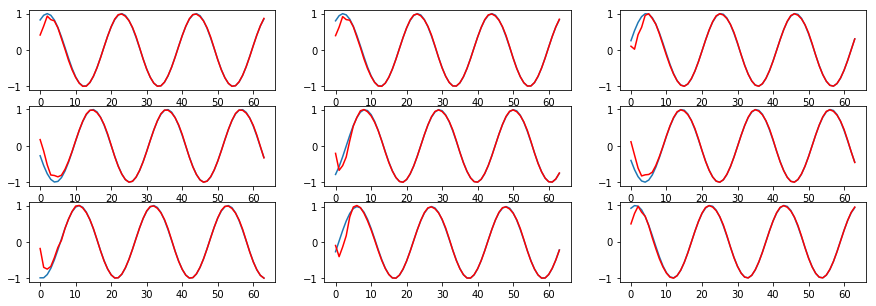

In [9]:
N = test_x.shape[0]
idices = np.random.choice(np.arange(N), size=9, replace=False)

result_pred = []
result_true = []

for idx in idices:
    sample_x = test_x[idx:idx+1]
    sample_y = test_y[idx:idx+1]
    state = np.zeros((sample_x.shape[0], HIDDEN_SIZE))
    _total_loss, _y_preds = sess.run([total_loss, y_preds], 
                                     feed_dict={rnn_input: sample_x, 
                                                rnn_output: sample_y,
                                                init_state: state})
    _y_preds = np.array(_y_preds).reshape(-1, 1)
    result_pred.append(_y_preds)
    result_true.append(sample_y.reshape(-1, 1))

fig, plots = plt.subplots(3, 3)
fig.set_figheight(5)
fig.set_figwidth(15)

plots = plots.reshape(-1)
for i, p in enumerate(plots):
    p.plot(result_true[i])
    p.plot(result_pred[i], color='red')